In [5]:
import pandas as pd

file_path = '/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/raw/ghcnh-station-list.csv'

# Load the CSV file, skipping the first row
df = pd.read_csv(file_path, on_bad_lines='skip', skiprows=1)

# Rename columns to 'station', 'Latitude', 'Longitude'
df.columns = ['station', 'Latitude', 'Longitude'] + list(df.columns[3:])

# Select the name, latitude, and longitude columns
df_lat_lon = df[['station', 'Latitude', 'Longitude']]

# Display the first few rows
df_lat_lon.head()
df.head()



,station,Latitude,Longitude
0,ACU55-00189,18.6,-63.47
1,ACU55-00190,18.6,-63.47
2,ACU55-00191,18.6,-63.47
3,ACU55-00192,18.6,-63.47
4,ACU55-00193,18.6,-63.47


In [6]:
# Define latitude and longitude bounds for Kansas
lat_min, lat_max = 36.9931, 40.0031
lon_min, lon_max = -102.0517, -94.5884

# Filter for rows within Kansas latitude and longitude range
kansas_stations = df_lat_lon[
    (df_lat_lon['Latitude'] >= lat_min) & (df_lat_lon['Latitude'] <= lat_max) &
    (df_lat_lon['Longitude'] >= lon_min) & (df_lat_lon['Longitude'] <= lon_max)
]

# Display the filtered DataFrame
print(kansas_stations)



           station  Latitude  Longitude
19389  USA00749094   38.7000   -96.8170
19992  USC00140326   37.8894   -98.1785
19993  USC00140441   39.6980  -101.0039
19994  USC00140637   37.6557   -96.5352
19995  USC00140750   37.8923   -97.4827
...            ...       ...        ...
25490  USW00093967   37.0911   -95.5725
25492  USW00093978   37.7017   -98.7469
25495  USW00093982   37.6833   -97.3333
25503  USW00093990   39.3742   -99.8300
25509  USW00093997   38.8725   -98.8092

[146 rows x 3 columns]


In [7]:
import pandas as pd

# Load the noaa_15 data (assuming you've already done this)
file_path = '/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/raw/noaa_2015/2015.csv'
noaa_15 = pd.read_csv(file_path)

# Rename the columns of noaa_15
noaa_15.columns = ['ID', 'YEAR/MONTH/DAY', 'ELEMENT', 'DATA VALUE', 
                   'M-FLAG', 'Q-FLAG', 'S-FLAG', 'OBS-TIME']

# Filter noaa_15 to include only the stations in kansas_stations
print(noaa_15)


                   ID  YEAR/MONTH/DAY ELEMENT  DATA VALUE M-FLAG Q-FLAG  \
0         AJ000037905        20150101    TAVG          47      H    NaN   
1         AJ000037923        20150101    TMAX          56    NaN    NaN   
2         AJ000037923        20150101    TMIN          34    NaN    NaN   
3         AJ000037923        20150101    TAVG          47      H    NaN   
4         AJ000037925        20150101    TMAX          66    NaN    NaN   
...               ...             ...     ...         ...    ...    ...   
36766746  VMW00041010        20151231    TMIN         245    NaN    NaN   
36766747  VMW00041010        20151231    PRCP          41      B    NaN   
36766748  VMW00041010        20151231    TAVG         261      H    NaN   
36766749  VMW00041011        20151231    PRCP           3    NaN    NaN   
36766750  VMW00041011        20151231    TAVG         256      H    NaN   

         S-FLAG  OBS-TIME  
0             S       NaN  
1             S       NaN  
2             S

In [8]:
# Convert the 'ID' column to string type and strip any whitespace
noaa_15['ID'] = noaa_15['ID'].astype(str).str.strip()

# Now, you can search for a specific station ID
station_id = 'USW00093738'  # Replace with the station ID you're looking for
station_id = station_id.strip()  # Ensure the station_id has no leading/trailing whitespace

# Filter the DataFrame to get data for the specific station
station_data = noaa_15[noaa_15['ID'] == station_id]

# Check if any data was found and display it
print(station_data)
print(station_data.__len__)
unique_count = noaa_15['ID'].nunique()
print(unique_count)




                   ID  YEAR/MONTH/DAY ELEMENT  DATA VALUE M-FLAG Q-FLAG  \
21988     USW00093738        20150101    ADPT         -89    NaN    NaN   
21989     USW00093738        20150101    ASLP       10210    NaN    NaN   
21990     USW00093738        20150101    ASTP       10091    NaN    NaN   
21991     USW00093738        20150101    AWBT         -39    NaN    NaN   
21992     USW00093738        20150101    AWND          31    NaN    NaN   
...               ...             ...     ...         ...    ...    ...   
36689623  USW00093738        20151231    WDF5         320    NaN    NaN   
36689624  USW00093738        20151231    WSF2          72    NaN    NaN   
36689625  USW00093738        20151231    WSF5          85    NaN    NaN   
36689626  USW00093738        20151231    WT01           1    NaN    NaN   
36689627  USW00093738        20151231    WT02           1    NaN    NaN   

         S-FLAG  OBS-TIME  
21988         W       NaN  
21989         W       NaN  
21990         W

In [9]:
# Filter the DataFrame to get data for the specific station
station_data_2 = noaa_15[noaa_15['ID'] == 'USW00093738']

# Check if any data was found and display it
print(station_data)
print(station_data.__len__)

                   ID  YEAR/MONTH/DAY ELEMENT  DATA VALUE M-FLAG Q-FLAG  \
21988     USW00093738        20150101    ADPT         -89    NaN    NaN   
21989     USW00093738        20150101    ASLP       10210    NaN    NaN   
21990     USW00093738        20150101    ASTP       10091    NaN    NaN   
21991     USW00093738        20150101    AWBT         -39    NaN    NaN   
21992     USW00093738        20150101    AWND          31    NaN    NaN   
...               ...             ...     ...         ...    ...    ...   
36689623  USW00093738        20151231    WDF5         320    NaN    NaN   
36689624  USW00093738        20151231    WSF2          72    NaN    NaN   
36689625  USW00093738        20151231    WSF5          85    NaN    NaN   
36689626  USW00093738        20151231    WT01           1    NaN    NaN   
36689627  USW00093738        20151231    WT02           1    NaN    NaN   

         S-FLAG  OBS-TIME  
21988         W       NaN  
21989         W       NaN  
21990         W

In [10]:
# Assuming the structure is as described in Scenario A
print("Type of kansas_stations:",(kansas_stations.dtypes))
print("Type of noaa_15:", (noaa_15.dtypes))

Type of kansas_stations: station       object
Latitude     float64
Longitude    float64
dtype: object
Type of noaa_15: ID                 object
YEAR/MONTH/DAY      int64
ELEMENT            object
DATA VALUE          int64
M-FLAG             object
Q-FLAG             object
S-FLAG             object
OBS-TIME          float64
dtype: object


In [11]:
# Extract the list of station names from kansas_stations DataFrame
kansas_station_ids = kansas_stations['station'].tolist()

# Filter noaa_15 to include only rows where 'ID' is in the list of Kansas station IDs
filtered_noaa_15 = noaa_15[noaa_15['ID'].isin(kansas_station_ids)]

# Display the first few rows to verify
print(filtered_noaa_15)
print(filtered_noaa_15.shape)
unique_count = filtered_noaa_15['ID'].nunique()
print(unique_count)


                   ID  YEAR/MONTH/DAY ELEMENT  DATA VALUE M-FLAG Q-FLAG  \
20821     USW00093909        20150101    TMAX          11    NaN    NaN   
20822     USW00093909        20150101    TMIN         -93    NaN    NaN   
20823     USW00093909        20150101    PRCP           0    NaN    NaN   
20824     USW00093909        20150101    AWND          47    NaN    NaN   
20825     USW00093909        20150101    WDF2         210    NaN    NaN   
...               ...             ...     ...         ...    ...    ...   
36761129  USC00148946        20151231    TMIN         -78    NaN    NaN   
36761130  USC00148946        20151231    TOBS         -67    NaN    NaN   
36761131  USC00148946        20151231    PRCP           0    NaN    NaN   
36761132  USC00148946        20151231    SNOW           0    NaN    NaN   
36761133  USC00148946        20151231    SNWD           0    NaN    NaN   

         S-FLAG  OBS-TIME  
20821         W       NaN  
20822         W       NaN  
20823         W

In [12]:
# Merge noaa_15 with kansas_stations on the station ID columns
# 'ID' in noaa_15 and 'station' in kansas_stations
merged_df = pd.merge(
    filtered_noaa_15, 
    kansas_stations[['station', 'Latitude', 'Longitude']], 
    left_on='ID', 
    right_on='station', 
    how='inner'
)

# Drop the duplicate 'station' column after the merge
merged_df = merged_df.drop(columns=['station'])

# Display the first few rows to verify the result
print(merged_df)
print(merged_df.shape)
unique_count = merged_df['ID'].nunique()
print(unique_count)

                 ID  YEAR/MONTH/DAY ELEMENT  DATA VALUE M-FLAG Q-FLAG S-FLAG  \
0       USW00093909        20150101    TMAX          11    NaN    NaN      W   
1       USW00093909        20150101    TMIN         -93    NaN    NaN      W   
2       USW00093909        20150101    PRCP           0    NaN    NaN      W   
3       USW00093909        20150101    AWND          47    NaN    NaN      W   
4       USW00093909        20150101    WDF2         210    NaN    NaN      W   
...             ...             ...     ...         ...    ...    ...    ...   
206668  USC00148946        20151231    TMIN         -78    NaN    NaN      7   
206669  USC00148946        20151231    TOBS         -67    NaN    NaN      7   
206670  USC00148946        20151231    PRCP           0    NaN    NaN      7   
206671  USC00148946        20151231    SNOW           0    NaN    NaN      7   
206672  USC00148946        20151231    SNWD           0    NaN    NaN      7   

        OBS-TIME  Latitude  Longitude  

Available columns in kansas_map:
Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

First few rows of kansas_map:
           featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   

                                   wikipedia iso_a2  adm0_sr          name  \
0     http://en.wikipedia.org/wiki/Minnesota     US        1     Minnesota   
1       http://en.wikipedia.org/wiki/Montana     US        1

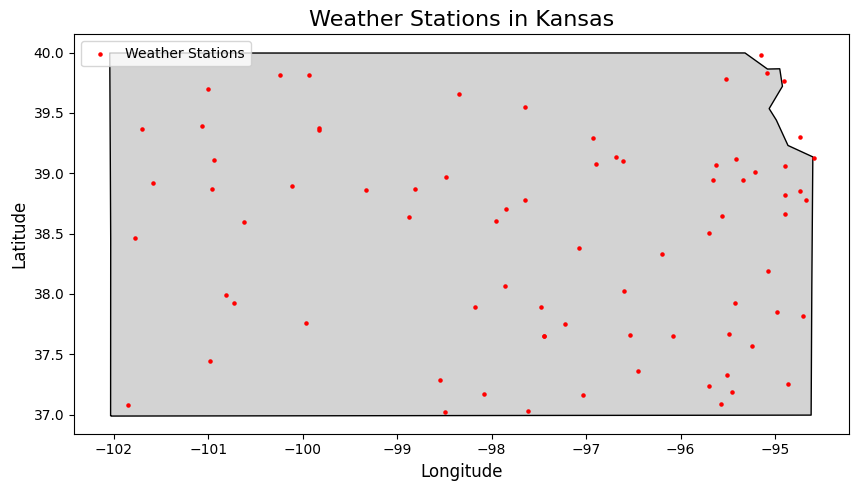

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df
# Extract unique stations based on latitude and longitude
unique_stations = merged_df[['ID', 'Latitude', 'Longitude']].drop_duplicates()

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    unique_stations, 
    geometry=gpd.points_from_xy(unique_stations['Longitude'], unique_stations['Latitude']),
    crs="EPSG:4326"  # Assuming your latitude and longitude are in WGS84
)

# Load the base map from the shapefile
kansas_map = gpd.read_file('/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/raw/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')

# Check available columns
print("Available columns in kansas_map:")
print(kansas_map.columns)

# Preview the first few rows to understand the data
print("\nFirst few rows of kansas_map:")
print(kansas_map.head())

# Identify the correct column to filter Kansas
# For example, if 'name' is the column with state names
if 'name' in kansas_map.columns:
    state_column = 'name'
elif 'NAME' in kansas_map.columns:
    state_column = 'NAME'
elif 'postal' in kansas_map.columns:
    state_column = 'postal'
else:
    raise KeyError("No suitable column found for state names.")

# Filter the map for Kansas
if state_column == 'postal':
    kansas_map = kansas_map[kansas_map[state_column] == 'KS']
else:
    kansas_map = kansas_map[kansas_map[state_column] == 'Kansas']

# Ensure CRS match
print("\nCRS before transformation:")
print("kansas_map CRS:", kansas_map.crs)
print("gdf CRS:", gdf.crs)

# Convert kansas_map CRS to match gdf if necessary
if kansas_map.crs != gdf.crs:
    kansas_map = kansas_map.to_crs(gdf.crs)

# Plot Kansas map and weather stations
fig, ax = plt.subplots(figsize=(10, 10))
kansas_map.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5, label='Weather Stations')

# Add labels and title
plt.title('Weather Stations in Kansas', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()

plt.show()





In [20]:
merged_df.to_csv('/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/processed/merged_data.csv', index=False)